In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read() 

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results) 

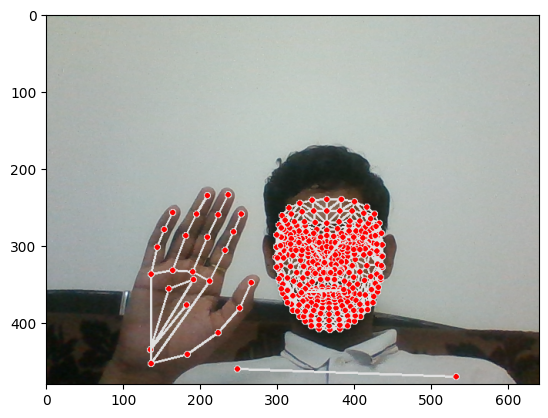

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [10]:
result_test = extract_keypoints(results)

In [11]:
result_test

array([ 0.56425536,  0.67152137, -0.88542736, ...,  0.25700614,
        0.53596544, -0.04500826])

In [12]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [13]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [14]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(5) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows() 

In [15]:
cap.release()
cv2.destroyAllWindows()

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [17]:
label_map = {label:num for num, label in enumerate(actions)}

In [18]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
np.array(sequences).shape

(90, 30, 1662)

In [20]:
np.array(labels).shape

(90,)

In [21]:
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [22]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [24]:
X_train.shape

(85, 30, 1662)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard 

In [26]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [27]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [28]:
X.shape

(90, 30, 1662)

In [29]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 5s 117ms/step - loss: 1.3274 - categorical_accuracy: 0.2941
Epoch 2/1000
3/3 [==============================] - 0s 161ms/step - loss: 9.0045 - categorical_accuracy: 0.2235
Epoch 3/1000
3/3 [==============================] - 0s 156ms/step - loss: 1.5524 - categorical_accuracy: 0.3294
Epoch 4/1000
3/3 [==============================] - 0s 154ms/step - loss: 2.4344 - categorical_accuracy: 0.3059
Epoch 5/1000
3/3 [==============================] - 0s 156ms/step - loss: 2.5342 - categorical_accuracy: 0.3647
Epoch 6/1000
3/3 [==============================] - 0s 105ms/step - loss: 1.6106 - categorical_accuracy: 0.3647
Epoch 7/1000
3/3 [==============================] - 0s 155ms/step - loss: 1.2501 - categorical_accuracy: 0.3176
Epoch 8/1000
3/3 [==============================] - 0s 155ms/step - loss: 1.0451 - categorical_accuracy: 0.4706
Epoch 9/1000
3/3 [==============================] - 0s 152ms/step - loss: 1.0546 - categorical_accuracy:

3/3 [==============================] - 0s 175ms/step - loss: 1.0915 - categorical_accuracy: 0.3647
Epoch 74/1000
3/3 [==============================] - 0s 158ms/step - loss: 1.0863 - categorical_accuracy: 0.3647
Epoch 75/1000
3/3 [==============================] - 0s 154ms/step - loss: 1.0869 - categorical_accuracy: 0.3647
Epoch 76/1000
3/3 [==============================] - 0s 162ms/step - loss: 1.0830 - categorical_accuracy: 0.3647
Epoch 77/1000
3/3 [==============================] - 0s 164ms/step - loss: 1.0831 - categorical_accuracy: 0.3882
Epoch 78/1000
3/3 [==============================] - 0s 157ms/step - loss: 1.0806 - categorical_accuracy: 0.3882
Epoch 79/1000
3/3 [==============================] - 0s 115ms/step - loss: 1.0785 - categorical_accuracy: 0.3765
Epoch 80/1000
3/3 [==============================] - 0s 155ms/step - loss: 1.0771 - categorical_accuracy: 0.4000
Epoch 81/1000
3/3 [==============================] - 0s 154ms/step - loss: 1.0748 - categorical_accuracy: 0.41

3/3 [==============================] - 0s 156ms/step - loss: 0.4611 - categorical_accuracy: 0.7059
Epoch 146/1000
3/3 [==============================] - 0s 160ms/step - loss: 0.4695 - categorical_accuracy: 0.7059
Epoch 147/1000
3/3 [==============================] - 0s 157ms/step - loss: 0.4456 - categorical_accuracy: 0.6941
Epoch 148/1000
3/3 [==============================] - 0s 156ms/step - loss: 0.4708 - categorical_accuracy: 0.7059
Epoch 149/1000
3/3 [==============================] - 0s 108ms/step - loss: 0.4332 - categorical_accuracy: 0.7059
Epoch 150/1000
3/3 [==============================] - 0s 177ms/step - loss: 0.4337 - categorical_accuracy: 0.7765
Epoch 151/1000
3/3 [==============================] - 0s 167ms/step - loss: 0.4506 - categorical_accuracy: 0.7176
Epoch 152/1000
3/3 [==============================] - 0s 160ms/step - loss: 0.4763 - categorical_accuracy: 0.6706
Epoch 153/1000
3/3 [==============================] - 0s 169ms/step - loss: 0.4321 - categorical_accura

Epoch 217/1000
3/3 [==============================] - 0s 153ms/step - loss: 4.4664 - categorical_accuracy: 0.2353
Epoch 218/1000
3/3 [==============================] - 0s 154ms/step - loss: 2.5397 - categorical_accuracy: 0.3647
Epoch 219/1000
3/3 [==============================] - 0s 158ms/step - loss: 2.3645 - categorical_accuracy: 0.3294
Epoch 220/1000
3/3 [==============================] - 0s 165ms/step - loss: 1.7654 - categorical_accuracy: 0.3412
Epoch 221/1000
3/3 [==============================] - 0s 184ms/step - loss: 1.2589 - categorical_accuracy: 0.3529
Epoch 222/1000
3/3 [==============================] - 0s 166ms/step - loss: 1.2373 - categorical_accuracy: 0.2471
Epoch 223/1000
3/3 [==============================] - 0s 157ms/step - loss: 1.3829 - categorical_accuracy: 0.3412
Epoch 224/1000
3/3 [==============================] - 0s 158ms/step - loss: 1.0749 - categorical_accuracy: 0.3882
Epoch 225/1000
3/3 [==============================] - 0s 159ms/step - loss: 1.2386 - cat

3/3 [==============================] - 0s 164ms/step - loss: 1.0860 - categorical_accuracy: 0.3882
Epoch 289/1000
3/3 [==============================] - 0s 156ms/step - loss: 1.0954 - categorical_accuracy: 0.3294
Epoch 290/1000
3/3 [==============================] - 0s 165ms/step - loss: 1.1033 - categorical_accuracy: 0.3765
Epoch 291/1000
3/3 [==============================] - 0s 153ms/step - loss: 1.0919 - categorical_accuracy: 0.3647
Epoch 292/1000
3/3 [==============================] - 0s 160ms/step - loss: 1.0846 - categorical_accuracy: 0.3647
Epoch 293/1000
3/3 [==============================] - 0s 153ms/step - loss: 1.1185 - categorical_accuracy: 0.3647
Epoch 294/1000
3/3 [==============================] - 0s 161ms/step - loss: 1.1061 - categorical_accuracy: 0.3294
Epoch 295/1000
3/3 [==============================] - 0s 154ms/step - loss: 1.1112 - categorical_accuracy: 0.2941
Epoch 296/1000
3/3 [==============================] - 0s 148ms/step - loss: 1.1016 - categorical_accura

Epoch 360/1000
3/3 [==============================] - 0s 160ms/step - loss: 1.1066 - categorical_accuracy: 0.3882
Epoch 361/1000
3/3 [==============================] - 0s 161ms/step - loss: 1.1284 - categorical_accuracy: 0.3647
Epoch 362/1000
3/3 [==============================] - 0s 163ms/step - loss: 1.0910 - categorical_accuracy: 0.3647
Epoch 363/1000
3/3 [==============================] - 0s 153ms/step - loss: 1.0939 - categorical_accuracy: 0.3882
Epoch 364/1000
3/3 [==============================] - 0s 160ms/step - loss: 1.0871 - categorical_accuracy: 0.2941
Epoch 365/1000
3/3 [==============================] - 0s 155ms/step - loss: 1.0866 - categorical_accuracy: 0.3294
Epoch 366/1000
3/3 [==============================] - 0s 155ms/step - loss: 1.0725 - categorical_accuracy: 0.4118
Epoch 367/1000
3/3 [==============================] - 0s 163ms/step - loss: 1.0936 - categorical_accuracy: 0.3412
Epoch 368/1000
3/3 [==============================] - 0s 161ms/step - loss: 1.0885 - cat

3/3 [==============================] - 0s 156ms/step - loss: 0.8387 - categorical_accuracy: 0.5765
Epoch 432/1000
3/3 [==============================] - 0s 124ms/step - loss: 0.7784 - categorical_accuracy: 0.6118
Epoch 433/1000
3/3 [==============================] - 0s 154ms/step - loss: 0.7218 - categorical_accuracy: 0.5765
Epoch 434/1000
3/3 [==============================] - 0s 159ms/step - loss: 0.6752 - categorical_accuracy: 0.6118
Epoch 435/1000
3/3 [==============================] - 0s 157ms/step - loss: 0.7019 - categorical_accuracy: 0.6471
Epoch 436/1000
3/3 [==============================] - 0s 163ms/step - loss: 0.7752 - categorical_accuracy: 0.5765
Epoch 437/1000
3/3 [==============================] - 0s 161ms/step - loss: 0.6972 - categorical_accuracy: 0.6235
Epoch 438/1000
3/3 [==============================] - 0s 155ms/step - loss: 0.6526 - categorical_accuracy: 0.6471
Epoch 439/1000
3/3 [==============================] - 0s 155ms/step - loss: 0.6699 - categorical_accura

Epoch 503/1000
3/3 [==============================] - 0s 169ms/step - loss: 0.4589 - categorical_accuracy: 0.7529
Epoch 504/1000
3/3 [==============================] - 0s 175ms/step - loss: 0.4830 - categorical_accuracy: 0.7529
Epoch 505/1000
3/3 [==============================] - 0s 172ms/step - loss: 0.4572 - categorical_accuracy: 0.7412
Epoch 506/1000
3/3 [==============================] - 0s 174ms/step - loss: 0.4630 - categorical_accuracy: 0.7647
Epoch 507/1000
3/3 [==============================] - 0s 176ms/step - loss: 0.4644 - categorical_accuracy: 0.7412
Epoch 508/1000
3/3 [==============================] - 0s 168ms/step - loss: 0.4678 - categorical_accuracy: 0.7647
Epoch 509/1000
3/3 [==============================] - 0s 168ms/step - loss: 0.4615 - categorical_accuracy: 0.7765
Epoch 510/1000
3/3 [==============================] - 0s 195ms/step - loss: 0.4497 - categorical_accuracy: 0.7294
Epoch 511/1000
3/3 [==============================] - 1s 200ms/step - loss: 0.4653 - cat

3/3 [==============================] - 1s 197ms/step - loss: 0.2860 - categorical_accuracy: 0.8824
Epoch 575/1000
3/3 [==============================] - 0s 164ms/step - loss: 0.3092 - categorical_accuracy: 0.8118
Epoch 576/1000
3/3 [==============================] - 1s 194ms/step - loss: 0.3924 - categorical_accuracy: 0.8000
Epoch 577/1000
3/3 [==============================] - 1s 198ms/step - loss: 0.4185 - categorical_accuracy: 0.7882
Epoch 578/1000
3/3 [==============================] - 1s 194ms/step - loss: 0.4297 - categorical_accuracy: 0.7765
Epoch 579/1000
3/3 [==============================] - 1s 198ms/step - loss: 0.4605 - categorical_accuracy: 0.8000
Epoch 580/1000
3/3 [==============================] - 1s 207ms/step - loss: 0.2736 - categorical_accuracy: 0.9059
Epoch 581/1000
3/3 [==============================] - 1s 197ms/step - loss: 0.2885 - categorical_accuracy: 0.8706
Epoch 582/1000
3/3 [==============================] - 1s 212ms/step - loss: 0.2788 - categorical_accura

Epoch 646/1000
3/3 [==============================] - 1s 213ms/step - loss: 0.2342 - categorical_accuracy: 0.9059
Epoch 647/1000
3/3 [==============================] - 1s 230ms/step - loss: 0.2295 - categorical_accuracy: 0.9176
Epoch 648/1000
3/3 [==============================] - 1s 290ms/step - loss: 0.2329 - categorical_accuracy: 0.9059
Epoch 649/1000
3/3 [==============================] - 1s 245ms/step - loss: 0.2282 - categorical_accuracy: 0.9176
Epoch 650/1000
3/3 [==============================] - 1s 213ms/step - loss: 0.2404 - categorical_accuracy: 0.9294
Epoch 651/1000
3/3 [==============================] - 1s 208ms/step - loss: 0.2296 - categorical_accuracy: 0.9059
Epoch 652/1000
3/3 [==============================] - 1s 208ms/step - loss: 0.2233 - categorical_accuracy: 0.9059
Epoch 653/1000
3/3 [==============================] - 1s 208ms/step - loss: 0.2168 - categorical_accuracy: 0.9059
Epoch 654/1000
3/3 [==============================] - 1s 206ms/step - loss: 0.2166 - cat

3/3 [==============================] - 1s 211ms/step - loss: 0.1730 - categorical_accuracy: 0.9412
Epoch 718/1000
3/3 [==============================] - 1s 318ms/step - loss: 0.1817 - categorical_accuracy: 0.9412
Epoch 719/1000
3/3 [==============================] - 1s 261ms/step - loss: 0.2396 - categorical_accuracy: 0.8941
Epoch 720/1000
3/3 [==============================] - 1s 294ms/step - loss: 0.2128 - categorical_accuracy: 0.8941
Epoch 721/1000
3/3 [==============================] - 1s 257ms/step - loss: 0.3088 - categorical_accuracy: 0.8471
Epoch 722/1000
3/3 [==============================] - 1s 242ms/step - loss: 0.0935 - categorical_accuracy: 0.9529
Epoch 723/1000
3/3 [==============================] - 1s 286ms/step - loss: 0.0904 - categorical_accuracy: 0.9529
Epoch 724/1000
3/3 [==============================] - 1s 222ms/step - loss: 0.1446 - categorical_accuracy: 0.9529
Epoch 725/1000
3/3 [==============================] - 1s 205ms/step - loss: 0.1774 - categorical_accura

Epoch 789/1000
3/3 [==============================] - 0s 167ms/step - loss: 0.0088 - categorical_accuracy: 1.0000
Epoch 790/1000
3/3 [==============================] - 0s 164ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 791/1000
3/3 [==============================] - 0s 165ms/step - loss: 0.0081 - categorical_accuracy: 1.0000
Epoch 792/1000
3/3 [==============================] - 0s 163ms/step - loss: 0.0079 - categorical_accuracy: 1.0000
Epoch 793/1000
3/3 [==============================] - 0s 168ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 794/1000
3/3 [==============================] - 0s 163ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 795/1000
3/3 [==============================] - 0s 169ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 796/1000
3/3 [==============================] - 0s 186ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 797/1000
3/3 [==============================] - 1s 195ms/step - loss: 0.0054 - cat

3/3 [==============================] - 0s 175ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 861/1000
3/3 [==============================] - 0s 186ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 862/1000
3/3 [==============================] - 0s 167ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 863/1000
3/3 [==============================] - 0s 184ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 864/1000
3/3 [==============================] - 1s 186ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 865/1000
3/3 [==============================] - 1s 189ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 866/1000
3/3 [==============================] - 1s 193ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 867/1000
3/3 [==============================] - 0s 174ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 868/1000
3/3 [==============================] - 0s 168ms/step - loss: 0.0012 - categorical_accura

3/3 [==============================] - 1s 191ms/step - loss: 5.6357e-04 - categorical_accuracy: 1.0000
Epoch 931/1000
3/3 [==============================] - 0s 184ms/step - loss: 5.6944e-04 - categorical_accuracy: 1.0000
Epoch 932/1000
3/3 [==============================] - 0s 177ms/step - loss: 5.6410e-04 - categorical_accuracy: 1.0000
Epoch 933/1000
3/3 [==============================] - 0s 186ms/step - loss: 5.4779e-04 - categorical_accuracy: 1.0000
Epoch 934/1000
3/3 [==============================] - 1s 196ms/step - loss: 5.4459e-04 - categorical_accuracy: 1.0000
Epoch 935/1000
3/3 [==============================] - 1s 259ms/step - loss: 5.3839e-04 - categorical_accuracy: 1.0000
Epoch 936/1000
3/3 [==============================] - 1s 206ms/step - loss: 5.3867e-04 - categorical_accuracy: 1.0000
Epoch 937/1000
3/3 [==============================] - 1s 184ms/step - loss: 5.4740e-04 - categorical_accuracy: 1.0000
Epoch 938/1000
3/3 [==============================] - 1s 189ms/step - l

3/3 [==============================] - 0s 171ms/step - loss: 3.0386e-04 - categorical_accuracy: 1.0000
Epoch 1000/1000
3/3 [==============================] - 0s 176ms/step - loss: 2.9640e-04 - categorical_accuracy: 1.0000


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [32]:
res=model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [41]:
actions[np.argmax(res[3])]

'hello'

In [42]:
actions[np.argmax(y_test[3])]

'hello'

In [43]:
model.save('action.h5')

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [55]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 69ms/step


In [56]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [52]:
ytrue


[0,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 0]

In [57]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[4, 1],
        [0, 0]],

       [[1, 0],
        [1, 3]]], dtype=int64)

In [58]:
accuracy_score(ytrue, yhat)

0.8

In [59]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [70]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        #sequence.append(keypoints)
        #sequence = sequence[-30:]
        sequence.insert(0,keypoints)
        sequence=sequence[:30]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
ilov

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [====

1/1 [==============================] - 0s 30ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediap

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/

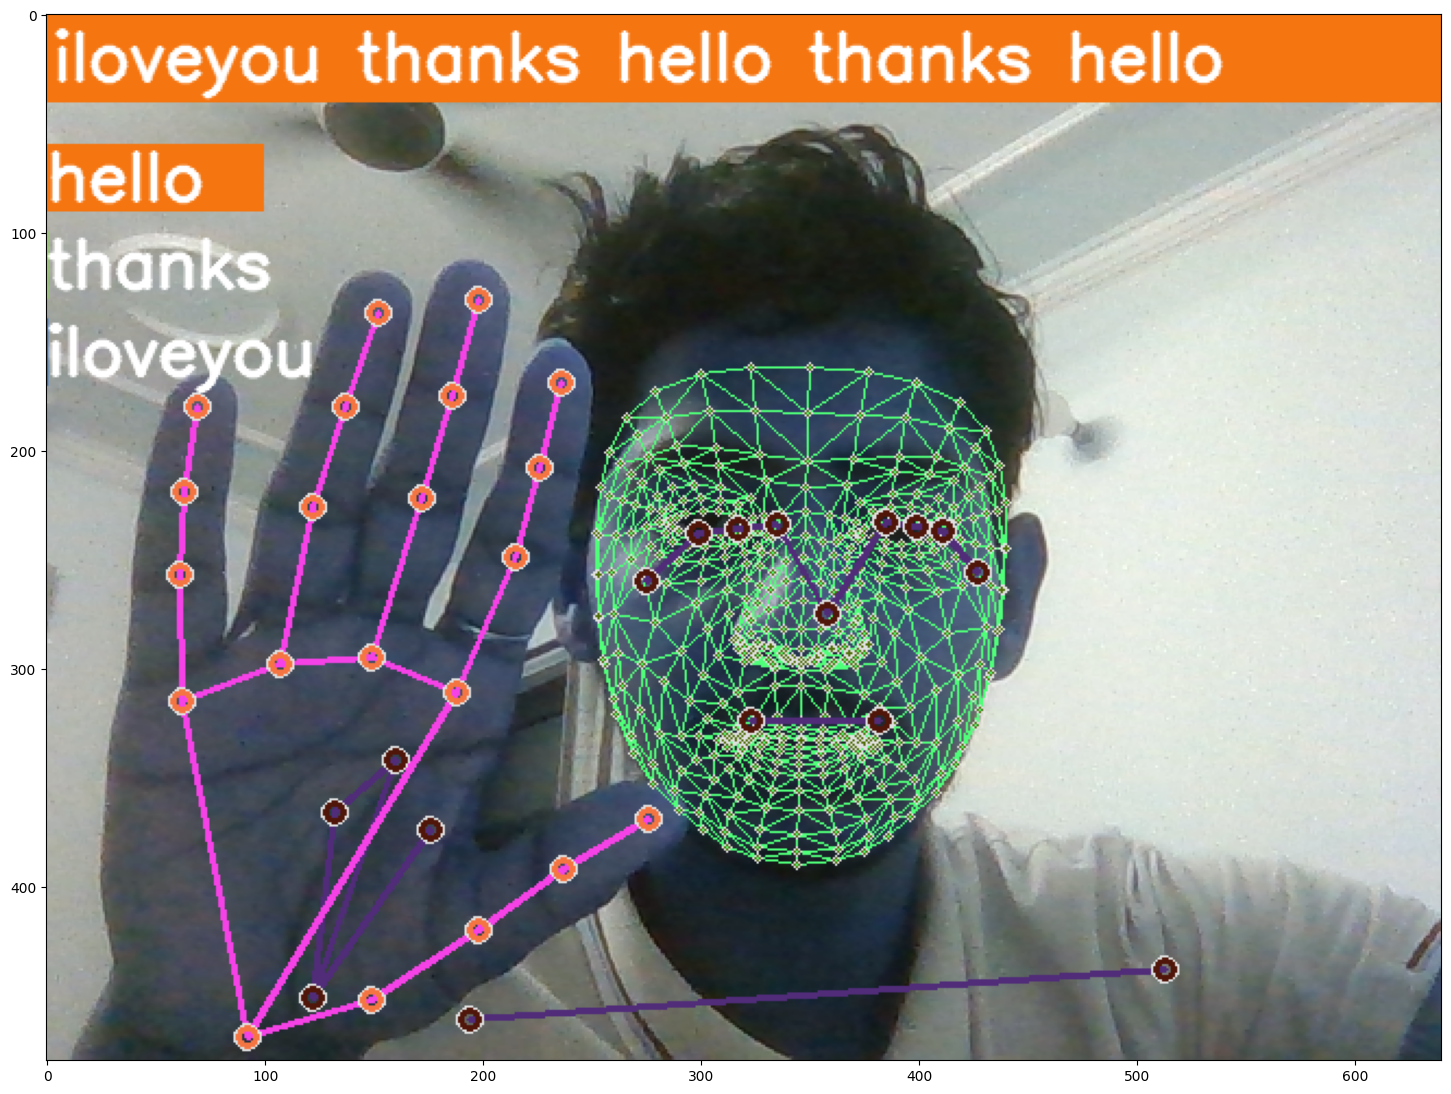

In [67]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))
